# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



1. Inisiasi jumlah kluster secara random, misalkan kita pilih k=2. K adalah sebuah parameter yang mewakilkan angka dari kluster yang data points nya akan dilakukan pengelompokan.
---
2. Tentukan posisi centroid secara random.
---
3. Hitung jarak antara data point ke centroid. Assign setiap data ke centroid terdekat (hal ini akan membentuk  k clusters).Perhitungan jarak antara titik data ke centroid menggunakan formula euclidean distance.
---
4. Kemudian hitung ulang centroid berdasarkan label-label data sebelumnya. Disini kita buat kembali centroid baru dan menghitung kembali jarak antar data poin ke centroid.
---
5. Kemudian di assign kembali data poin ke centroid terdekat yang terbaru, dan kita cek apakah ada perubahan dalam cluster atau tidak, jika ada maka kita perlu kembali ke poin 4 mencari posisi centroid yang tidak mengubah cluster. Hal ini kita lakukan perulangan sampai posisi centroid tidak berubah lagi.
---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [ ]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


In [ ]:
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [ ]:
#handling mising value 
df_handlmiss=df.fillna(method='ffill')

In [ ]:
df_handlmiss.isnull().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64

In [ ]:
#handling outlier
def finding_outlier(df_handlmiss):
    q1=df_handlmiss.quantile(0.25)
    q3=df_handlmiss.quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+(1.5*iqr)
    lower_bound=q1-(1.5*iqr)
    df0_final=df_handlmiss[(df_handlmiss < upper_bound) & (df_handlmiss > lower_bound)]
    return df0_final

In [ ]:
finding_outlier(df_handlmiss[['Umur','Skor Belanja (1-100)']])

,Umur,Skor Belanja (1-100)
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0
...,...,...
245,59.0,14.0
246,35.0,90.0
247,37.0,32.0
248,32.0,86.0


In [ ]:
#remove outlier
def remove_outlier(df_handlmiss):
    q1=df_handlmiss.quantile(0.25)
    q3=df_handlmiss.quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+(1.5*iqr)
    lower_bound=q1-(1.5*iqr)
    df1_final=df_handlmiss[(df_handlmiss < upper_bound) & (df_handlmiss > lower_bound)]
    return df1_final

In [ ]:
df2=remove_outlier(df_Da[['Umur','Skor Belanja (1-100)']])
df2.dropna(axis=0, inplace=True)
df2

,Umur,Skor Belanja (1-100)
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0
...,...,...
244,27.0,69.0
245,59.0,14.0
246,35.0,90.0
247,37.0,32.0


In [ ]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
df_std =sc.fit_transform(df2.astype(float))

In [ ]:
from sklearn.cluster import KMeans 
kmeans1=KMeans(n_clusters=2,random_state=42).fit(df_std)
labels1=kmeans1.labels_
labels1

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0], dtype=int32)

In [ ]:
# membuat sebuah data baru 
df_baru=pd.DataFrame(data=df_std, columns=['Umur','Skor Belanja (1-100)'])
df_baru['label1_kmeans']=labels1

In [ ]:
df_baru

,Umur,Skor Belanja (1-100),label1_kmeans
0,-1.455005,-0.396407,0
1,-1.304215,1.119369,0
2,-1.379610,-1.587373,1
3,-1.153425,0.975009,0
4,-0.550263,-0.360317,0
...,...,...,...
243,-0.851844,0.686290,0
244,1.560802,-1.298654,1
245,-0.248682,1.444178,0
246,-0.097892,-0.649036,1


n_cluster =2


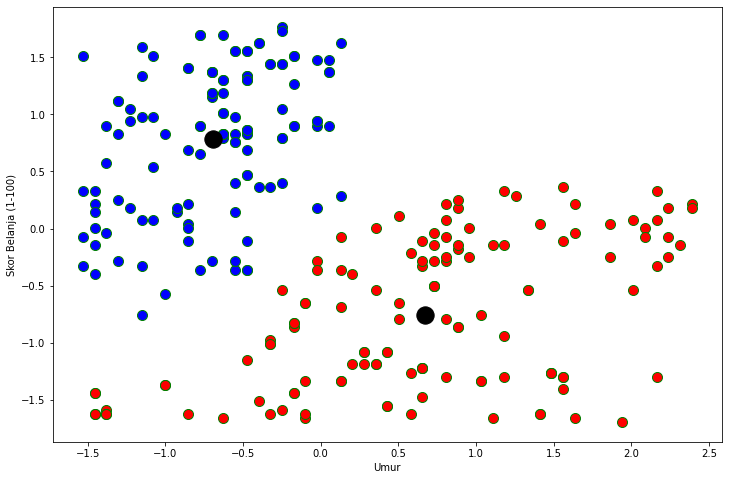

In [ ]:
#visualisasi cluster
print("n_cluster =2")
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,8))
plt.scatter(df_baru['Umur'][df_baru.label1_kmeans==0],df_baru['Skor Belanja (1-100)'][df_baru.label1_kmeans==0],c='blue',s=100,edgecolors='green')
plt.scatter(df_baru['Umur'][df_baru.label1_kmeans==1],df_baru['Skor Belanja (1-100)'][df_baru.label1_kmeans==1],c='red',s=100,edgecolors='green')
plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1],s=300, c='black')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

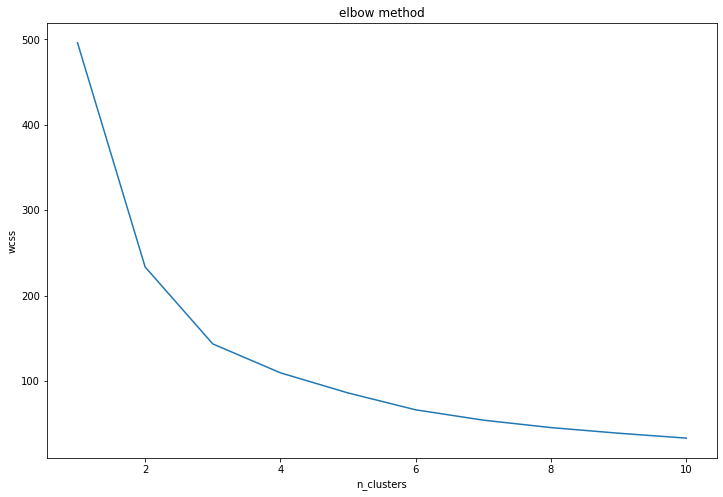

In [ ]:
#visualisasi elbow graph
import matplotlib.pyplot as plt
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42).fit(df_std)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#dari hasil elbow graph menunjukan pergerakan elbow yang bagus dari sumbu x dengan nilai 3 artinya ada 3 kmeans clustering 
kmeans2=KMeans(n_clusters=3,init='k-means++',random_state=42).fit(df_std)
labels2=kmeans2.labels_

In [ ]:
labels2 

array([2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1,
       2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 2, 0], dtype=int32)

In [ ]:
df2_baru=pd.DataFrame(data=df_std, columns=['Umur','Skor Belanja (1-100)'])
df2_baru['label2_kmeans']=labels2

In [ ]:
df2_baru

,Umur,Skor Belanja (1-100),label2_kmeans
0,-1.455005,-0.396407,2
1,-1.304215,1.119369,0
2,-1.379610,-1.587373,2
3,-1.153425,0.975009,0
4,-0.550263,-0.360317,2
...,...,...,...
243,-0.851844,0.686290,0
244,1.560802,-1.298654,1
245,-0.248682,1.444178,0
246,-0.097892,-0.649036,2


n_cluster =3


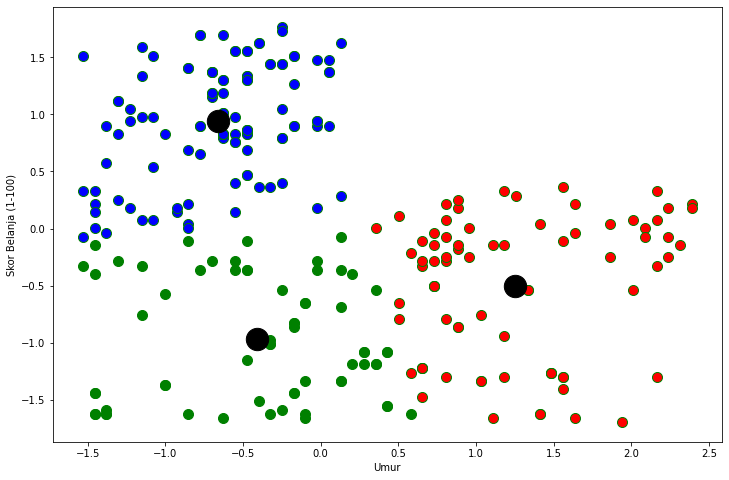

In [ ]:
print("n_cluster =3")
plt.figure(figsize=(12,8))
plt.scatter(df2_baru['Umur'][df2_baru.label2_kmeans==0],df2_baru['Skor Belanja (1-100)'][df2_baru.label2_kmeans==0],c='blue',s=100,edgecolors='green')
plt.scatter(df2_baru['Umur'][df2_baru.label2_kmeans==1],df2_baru['Skor Belanja (1-100)'][df2_baru.label2_kmeans==1],c='red',s=100,edgecolors='green')
plt.scatter(df2_baru['Umur'][df2_baru.label2_kmeans==2],df2_baru['Skor Belanja (1-100)'][df2_baru.label2_kmeans==2],c='green',s=100,edgecolors='green')
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],s=500, c='black')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

In [ ]:
from sklearn.metrics import  silhouette_score 
print(silhouette_score(df_std,labels=labels1))
print(silhouette_score(df_std,labels=labels2))

0.48555152598842644
0.4658669848365053


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)

# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

1. Pada kluster hubungan umur dengan Skor belanja di atas dibagi menjadi 3 kluster yaitu:


*   **kluster pertama** ditandai dengan warna **biru**,
*   **kluster kedua** di tandai dengan warna **merah**,
*   dan **kluster ketiga** ditandai dengan warna **hijau**.
---

2. Pada umur rentang nilai dari -1.5 sampai dengan 0.5  di kategorikan umur yang relatif masih muda terdapat dua kluster yaitu kluster pertama dan ketiga, dimana pada kluster ketiga rentang skor belanjanya lebih rendah dari skor belanja kluster pertama yang lebih tinggi dari -1.5 sampai dengan 0.0.

 ---

3. Pada kluster kedua dengan nilai dari 0.5 sampai dengan 2.5 di kategorikan umur yang relatif lebih tua dengan rentang skor belanjanya yang hampir menyerupai kluster pertama walaupun agak lebih sedikit.

---

4. Jika diurutkan rentang skor belanja kluster dari yang lebih besar ke kecil :
*   kluster pertama, biru, kategori umur relatif muda, bisa jadi merupakan konsumen dewasa muda.
*   kluster kedua, merah, kategori umur relatif tua, bisa jadi merupakan konsumen dewasa tua, dan orang-orang lansia.
*   kluster ketiga, hijau, kategori umur relatif muda, bisa jadi merupakan konsumen remaja.

---

5. Jika dilihat dari visualisasi kluster dan juga analisis yang dipaparkan, supermarket sebaiknya memasarkan banyak produk untuk kebutuhan orang-orang berumur relatif muda sehingga meningkatkan minat beli untuk menyasar konsumen remaja dan dewasa muda.

---

6. Sedangkan untuk meningkatkan pelanggan dari kategori umur relatif tua bisa dilakukan dengan cara melakukan promosi produk yang khusus untuk menyasar konsumen dari dewasa tua, dan orang-orang lansia, serta jika memungkinkan diberi diskon untuk menarik minat beli dari konsumen tersebut.

---







